In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import seaborn as sns

### Reload yesterday's data

In [4]:
import numpy as np
from scipy.sparse import csr_matrix

def save_sparse_csr(filename, array):
    # note that .npz extension is added automatically
    np.savez(filename, data=array.data, indices=array.indices,
             indptr=array.indptr, shape=array.shape)

def load_sparse_csr(filename):
    # here we need to add .npz extension manually
    loader = np.load(filename + '.npz')
    return csr_matrix((loader['data'], loader['indices'], loader['indptr']),
                      shape=loader['shape'])

In [5]:
wc_file = "../../data/documents/word_counts.txt"
X = load_sparse_csr(wc_file)

In [6]:
type(X)

scipy.sparse.csr.csr_matrix

### SVD

- https://www.quora.com/What-is-an-intuitive-explanation-of-singular-value-decomposition-SVD

Searching for how to run SVD in Python, I come across two implementations: 

- [`numpy.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html)
- [`scipy.linalg.svd`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html)

> [Why both numpy.linalg and scipy.linalg? What’s the difference?](https://www.scipy.org/scipylib/faq.html#why-both-numpy-linalg-and-scipy-linalg-what-s-the-difference)
>
> scipy.linalg is a more complete wrapping of Fortran LAPACK using f2py.

### SVD on whole matrix

In [7]:
X.toarray().shape

(177140, 99946)

When we run SVD on the full matrix, we get dead kernels. The size of the matrix is too big

In [8]:
# import numpy as np
#
# U, s, V = np.linalg.svd(X.toarray(), full_matrices=True)

In [9]:
# import scipy.linalg
#
# scipy.linalg.svd(X.toarray())

### SVD on a subset of the matrix

In [10]:
x = X.toarray()[:10000, :100]

In [11]:
import scipy.linalg

U, s, Vh = scipy.linalg.svd(x)
U.shape, Vh.shape, s.shape

((10000, 10000), (100, 100), (100,))

[<matplotlib.text.Text at 0x112824908>, <matplotlib.text.Text at 0x11280c0b8>]

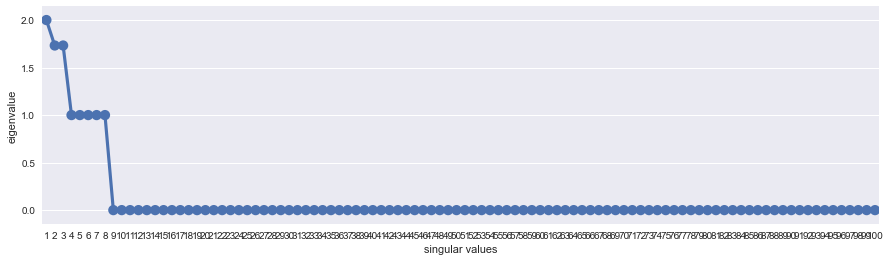

In [12]:
f, ax = plt.subplots(figsize=(15,4))
sns.pointplot(y=s, x=list(range(1,len(s)+1)))

ax.set(xlabel="singular values", ylabel="eigenvalue")

Information in first 8 singluar values

In [13]:
numSV = 8
s[:numSV]

array([ 2.        ,  1.73205081,  1.73205081,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ])

In [14]:
U = U[:,:numSV]
Vh = Vh[:numSV,:]
s = s[:numSV]

U.shape, Vh.shape, s.shape

((10000, 8), (8, 100), (8,))

In [15]:
# Now we reconstruct the original matrix using this matrix decomposition we did above
reconstructed = np.dot(np.dot(U,np.diag(s)), Vh)

In [16]:
reconstructed

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

### Future work
Figure out how to decompose the full matrix